# Dataset 3

## Question 1: Feature Preprocessing
1. **Feature Encoding:** Use one-hot-encoding for the following 3 categorical features: ft4, ft5, ft6. Use the encoded features and the numerical features to fit a linear regression model. 
2. **Standardization:** Standardize (see the Useful Functions Section) all these numerical features and keep the one-hot-encoded features. Fit a linear regression model.
3. Divide **ft1** into 3 ranges: < 30, \[30, 50\] and > 50. That is, set the new values to 1 for original values below 30, 2 for values between 30 and 50 and 3 for values above 50. Standardize **ft2** and **ft3** feature. One-hot encoding the rest three categorical featrues. Fit a linear regression model.

(1) Report the average training RMSE and acerage test RMSE for 10 fold cross validation.

(2) Plot fitted values against true values as scatter plots using the whole dataset.

(3) Plot residuals versus fitted values as scatter plots using the whole dataset.

In [135]:
import pandas as pd
import numpy as np

# Load the data
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
print(data3.iloc[:,0].size)
data3.head()

1338


,ft1,ft2,ft3,ft4,ft5,ft6,charges
0,19,27.900,0,female,yes,southwest,16884.92400
1,18,33.770,1,male,no,southeast,1725.55230
2,28,33.000,3,male,no,southeast,4449.46200
3,33,22.705,0,male,no,northwest,21984.47061
4,32,28.880,0,male,no,northwest,3866.85520


### Feature Encoding:
one-hot-encoding for ft4, ft5, ft6 and numerical features to fit a linear regression model.

In [136]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

# Feature Encoding
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
ohe = OneHotEncoder(n_values = 'auto', sparse = False)
fe456 = ohe.fit_transform(data3[['ft4','ft5','ft6']])
fe456 = pd.DataFrame(fe456, columns = ['f','m','n','y','NE','NW','SE','SW'])

In [137]:
from sklearn.linear_model import LinearRegression

# Construct linear regression model
lr = LinearRegression(n_jobs = -1)
y = data3['charges'].values
X = pd.concat([data3[['ft1','ft2','ft3']],
              fe456],
              axis=1).values

In [138]:
from sklearn import metrics
from sklearn.model_selection import KFold

# calculate average RMSE using 10-fold
kf = KFold(n_splits = 10)

rmse_train = 0
rmse_test = 0

for trainset, testset in kf.split(X):
    X_train, y_train = X[trainset, :], y[trainset]
    X_test, y_test = X[testset, :], y[testset]
    lr.fit(X_train, y_train)
    
    predicted_train = lr.predict(X_train)
    predicted_test = lr.predict(X_test)
    
    rmse_train_i = np.sqrt(metrics.mean_squared_error(y_train, predicted_train))
    rmse_test_i = np.sqrt(metrics.mean_squared_error(y_test, predicted_test))
    
    rmse_train = rmse_train + rmse_train_i
    rmse_test = rmse_test + rmse_test_i
    
    print('-' * 20)
    print("Train RMSE: ", rmse_train_i)
    print("Test RMSE: ", rmse_test_i)
    
rmse_train = rmse_train / 10.0
rmse_test = rmse_test / 10.0

print('-' * 20)
print("Averaged Train RMSE: ", rmse_train)
print("Averaged Test RMSE: ", rmse_test)

--------------------
Train RMSE:  6051.3695241838495
Test RMSE:  5976.341526998486
--------------------
Train RMSE:  6025.560377283273
Test RMSE:  6195.262808822173
--------------------
Train RMSE:  6038.250869795185
Test RMSE:  6087.498376385134
--------------------
Train RMSE:  6019.424200492137
Test RMSE:  6272.609595187519
--------------------
Train RMSE:  6026.574940183817
Test RMSE:  6213.039051800158
--------------------
Train RMSE:  6134.549933247374
Test RMSE:  5158.073086898697
--------------------
Train RMSE:  6095.320776848486
Test RMSE:  5545.814968532659
--------------------
Train RMSE:  5932.488996633746
Test RMSE:  6963.658229647404
--------------------
Train RMSE:  6072.260130482568
Test RMSE:  5772.909049941434
--------------------
Train RMSE:  5997.623956668823
Test RMSE:  6451.232130571958
--------------------
Averaged Train RMSE:  6039.342370581925
Averaged Test RMSE:  6063.643882478562


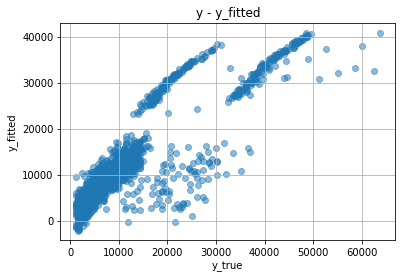

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot fitted values against true values 

y_fitted = lr.fit(X, y).predict(X)

plt.scatter(y, y_fitted, alpha=0.5)
plt.title("y - y_fitted")
plt.xlabel("y_true")
plt.ylabel("y_fitted")
plt.grid(True)

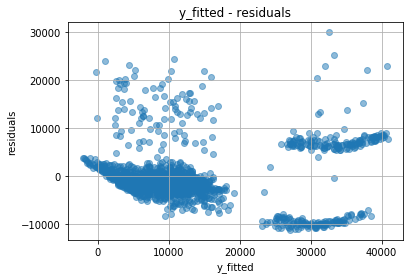

In [140]:
# Plot residuals versus fitted values
residuals = y - y_fitted

plt.scatter(y_fitted, residuals, alpha=0.5)
plt.title("y_fitted - residuals")
plt.xlabel("y_fitted")
plt.ylabel("residuals")
plt.grid(True)

### Standardization:
Standardize all numerical features and keep the one-hot-encoded features.

In [141]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Standardize numerical features
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
scaler = StandardScaler()
fs123 = scaler.fit_transform(data3[['ft1','ft2','ft3']])
fs123 = pd.DataFrame(fs123, columns = ['ft1','ft2','ft3'])

# Get the dataset
X = pd.concat([fs123, fe456], axis = 1).values

In [142]:
# calculate average RMSE using 10-fold
kf = KFold(n_splits = 10)

rmse_train = 0
rmse_test = 0

for trainset, testset in kf.split(X):
    X_train, y_train = X[trainset, :], y[trainset]
    X_test, y_test = X[testset, :], y[testset]
    lr.fit(X_train, y_train)
    
    predicted_train = lr.predict(X_train)
    predicted_test = lr.predict(X_test)
    
    rmse_train_i = np.sqrt(metrics.mean_squared_error(y_train, predicted_train))
    rmse_test_i = np.sqrt(metrics.mean_squared_error(y_test, predicted_test))
    
    rmse_train = rmse_train + rmse_train_i
    rmse_test = rmse_test + rmse_test_i
    
    print('-' * 20)
    print("Train RMSE: ", rmse_train_i)
    print("Test RMSE: ", rmse_test_i)
    
rmse_train = rmse_train / 10.0
rmse_test = rmse_test / 10.0

print('-' * 20)
print("Averaged Train RMSE: ", rmse_train)
print("Averaged Test RMSE: ", rmse_test)

--------------------
Train RMSE:  6051.3695241838495
Test RMSE:  5976.341526998486
--------------------
Train RMSE:  6025.560377283274
Test RMSE:  6195.262808822174
--------------------
Train RMSE:  6038.250869795185
Test RMSE:  6087.498376385133
--------------------
Train RMSE:  6019.424200492137
Test RMSE:  6272.609595187519
--------------------
Train RMSE:  6026.574940183817
Test RMSE:  6213.039051800158
--------------------
Train RMSE:  6134.549933247374
Test RMSE:  5158.073086898701
--------------------
Train RMSE:  6095.320776848485
Test RMSE:  5545.81496853266
--------------------
Train RMSE:  5932.488996633746
Test RMSE:  6963.658229647402
--------------------
Train RMSE:  6072.260130482567
Test RMSE:  5772.909049941432
--------------------
Train RMSE:  5997.623956668822
Test RMSE:  6451.232130571959
--------------------
Averaged Train RMSE:  6039.342370581925
Averaged Test RMSE:  6063.643882478562


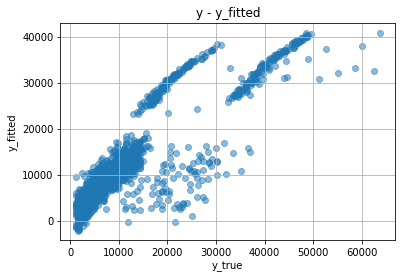

In [143]:
# Plot fitted values against true values 

y_fitted = lr.fit(X, y).predict(X)

plt.scatter(y, y_fitted, alpha=0.5)
plt.title("y - y_fitted")
plt.xlabel("y_true")
plt.ylabel("y_fitted")
plt.grid(True)

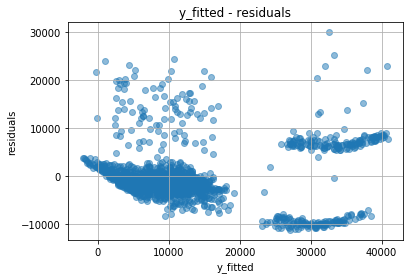

In [144]:
# Plot residuals versus fitted values
residuals = y - y_fitted

plt.scatter(y_fitted, residuals, alpha=0.5)
plt.title("y_fitted - residuals")
plt.xlabel("y_fitted")
plt.ylabel("residuals")
plt.grid(True)

### Divide ft1 into 3 ranges

In [145]:
# Divide ft1
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
ft1 = data3['ft1'].values
L = len(ft1)
for i in range(L):
    if ft1[i] < 30:
        ft1[i] = 1
    elif ft1[i] > 50:
        ft1[i] = 3
    else:
        ft1[i] = 2
        
ft1 = pd.DataFrame(ft1, columns = ['ft1'])
ft23 = fs123[['ft2','ft3']]
X = pd.concat([ft1, ft23, fe456], axis = 1).values

In [146]:
# calculate average RMSE using 10-fold
kf = KFold(n_splits = 10)

rmse_train = 0
rmse_test = 0

for trainset, testset in kf.split(X):
    X_train, y_train = X[trainset, :], y[trainset]
    X_test, y_test = X[testset, :], y[testset]
    lr.fit(X_train, y_train)
    
    predicted_train = lr.predict(X_train)
    predicted_test = lr.predict(X_test)
    
    rmse_train_i = np.sqrt(metrics.mean_squared_error(y_train, predicted_train))
    rmse_test_i = np.sqrt(metrics.mean_squared_error(y_test, predicted_test))
    
    rmse_train = rmse_train + rmse_train_i
    rmse_test = rmse_test + rmse_test_i
    
    print('-' * 20)
    print("Train RMSE: ", rmse_train_i)
    print("Test RMSE: ", rmse_test_i)
    
rmse_train = rmse_train / 10.0
rmse_test = rmse_test / 10.0

print('-' * 20)
print("Averaged Train RMSE: ", rmse_train)
print("Averaged Test RMSE: ", rmse_test)

--------------------
Train RMSE:  6218.897752834433
Test RMSE:  6051.384757511031
--------------------
Train RMSE:  6184.2752726955205
Test RMSE:  6352.292413446175
--------------------
Train RMSE:  6177.846079737399
Test RMSE:  6417.106727227786
--------------------
Train RMSE:  6167.937668115899
Test RMSE:  6514.3908259225445
--------------------
Train RMSE:  6202.875056032284
Test RMSE:  6213.293324441344
--------------------
Train RMSE:  6285.9887757629685
Test RMSE:  5390.965302787943
--------------------
Train RMSE:  6250.3377392278035
Test RMSE:  5739.512716296268
--------------------
Train RMSE:  6085.838920948148
Test RMSE:  7164.010402838773
--------------------
Train RMSE:  6242.548668025446
Test RMSE:  5815.526771378088
--------------------
Train RMSE:  6161.972899673732
Test RMSE:  6559.8331919120155
--------------------
Averaged Train RMSE:  6197.851883305363
Averaged Test RMSE:  6221.831643376196


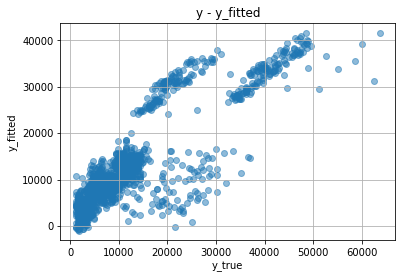

In [147]:
# Plot fitted values against true values 

y_fitted = lr.fit(X, y).predict(X)

plt.scatter(y, y_fitted, alpha=0.5)
plt.title("y - y_fitted")
plt.xlabel("y_true")
plt.ylabel("y_fitted")
plt.grid(True)

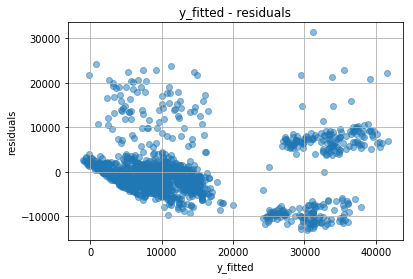

In [148]:
# Plot residuals versus fitted values
residuals = y - y_fitted

plt.scatter(y_fitted, residuals, alpha=0.5)
plt.title("y_fitted - residuals")
plt.xlabel("y_fitted")
plt.ylabel("residuals")
plt.grid(True)

## Question 2: Correlation exploration
1. Convert each categorical feature into a one dimensional numerical value. Now we have 6 numerical features. Use **f_regression** and mutual information regression measure to select two most important variables respectively. Report the two most important variables you find.
2. Scatter plot charges (y axis) vs ft2 (x axis), and color points based on ft5 (Yes or No).
3. Scatter plot charges (y axis) vs ft1 (x axis), and color points based on ft5 (Yes or No).

In [149]:
# Convert to numerical feature
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
fn123 = data3[['ft1','ft2','ft3']]
ft_dict = {"female":0,"male":1,"yes":1,"no":0,
          "northwest":1,"northeast":2,"southwest":3,"southeast":4}
fn4 = data3['ft4'].values
fn5 = data3['ft5'].values
L = len(fn4)
for i in range(L):
    fn4[i] = 1 if fn4[i] == "male" else 0
    fn5[i] = 1 if fn5[i] == "yes" else 0
fn6 = data3['ft6'].values
for i in range(L):
    if fn6[i] == "northwest":
        fn6[i] = ft_dict["northwest"]
    elif fn6[i] == "northeast":
        fn6[i] = ft_dict["northeast"]
    elif fn6[i] == "southwest":
        fn6[i] = ft_dict["southwest"]
    elif fn6[i] == "southeast":
        fn6[i] = ft_dict["southeast"]
    else:
        print("Value Error!")
        print(i)
        break
fn4 = pd.DataFrame(fn4, columns = ['ft4'])
fn5 = pd.DataFrame(fn5, columns = ['ft5'])
fn6 = pd.DataFrame(fn6, columns = ['ft6'])
X = pd.concat([fn123, fn4, fn5, fn6], axis = 1)

In [166]:
from sklearn.feature_selection import f_regression

# f_score accounts for relevance, the bigger, the better
# p-value is the posibility of mis-predicting the relevance

# Use f_regression
f_score, p_val = f_regression(X,y)
f_score_sort_idx = np.argsort(-f_score)
print('-'*20, "f_regression", '-'*20)
print("The first relevant feature is:","ft",f_score_sort_idx[0]+1)
print("The corresponding f-score is:",f_score[f_score_sort_idx[0]])
print("The corresponding p-value is:",p_val[f_score_sort_idx[0]])
print("The second relevant feature is:","ft",f_score_sort_idx[1]+1)
print("The corresponding f-score is:",f_score[f_score_sort_idx[1]])
print("The corresponding p-value is:",p_val[f_score_sort_idx[1]])

-------------------- f_regression --------------------
The first relevant feature is: ft 5
The corresponding f-score is: 2177.6148680565198
The corresponding p-value is: 8.271435842181086e-283
The second relevant feature is: ft 1
The corresponding f-score is: 131.17401258017017
The corresponding p-value is: 4.886693331722474e-29


#### In f_regression, ft5 & ft1 are selected.

In [167]:
from sklearn.feature_selection import mutual_info_regression

# Use mutual information regression measure
mi = mutual_info_regression(X, y, random_state = 42)
mi_sort_idx = np.argsort(-mi)
print('-'*20, "mutual_info_regression", '-'*20)
print("The first relevant feature is:","ft",mi_sort_idx[0]+1)
print("The mutual-info is:",mi[mi_sort_idx[0]])
print("The second relevant feature is:","ft",mi_sort_idx[1]+1)
print("The mutual-info is:",mi[mi_sort_idx[1]])

-------------------- mutual_info_regression --------------------
The first relevant feature is: ft 1
The mutual-info is: 1.498699315666744
The second relevant feature is: ft 5
The mutual-info is: 0.3691710531017536


#### For mutual_info_regression, ft1 & ft5 are selected.

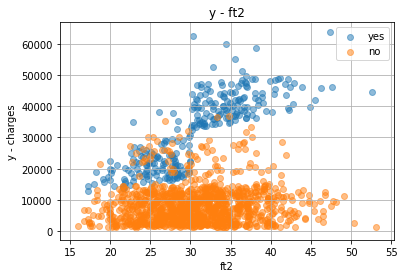

In [172]:
# Plot y against ft2

ft1 = data3['ft1'].values
ft2 = data3['ft2'].values
ft5_y = [i for i in range(L) if fn5.values[i] > 0]
ft5_n = [i for i in range(L) if fn5.values[i] == 0]

plt.scatter(ft2[ft5_y], y[ft5_y], alpha=0.5)
plt.scatter(ft2[ft5_n], y[ft5_n], alpha=0.5)
plt.title("y - ft2")
plt.xlabel("ft2")
plt.ylabel("y - charges")
plt.grid(True)
plt.legend(['yes','no'])

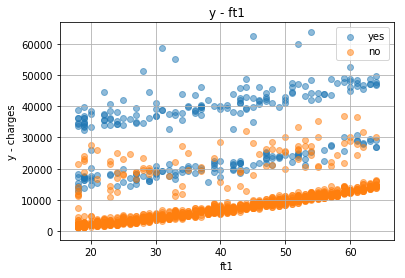

In [173]:
# Plot y against ft1
plt.scatter(ft1[ft5_y], y[ft5_y], alpha=0.5)
plt.scatter(ft1[ft5_n], y[ft5_n], alpha=0.5)
plt.title("y - ft1")
plt.xlabel("ft1")
plt.ylabel("y - charges")
plt.grid(True)
plt.legend(['yes','no'])

## Question 3: Modify the target variable
As we have seen so far, the target variable: charges (y) spans a wide range, so here instead of fitting the original value, we consider fitting log(y). Note here instead of calculating the difference between predicted value $(log(y_{predict}))$ and transformed target values (log y), we calculate the difference between $exp(log(y)_{predict})$ and y to set up a fair comparison.

- Pick one method of feature preprocessing from question 1 to train a linear regression model on this new target. Does the performance improve?
- Repaeat the correlation exploration part for the new target.

### One-Hot-Encoding feature encoding is chosen here

In [189]:
# Feature Encoding
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
ohe = OneHotEncoder(n_values = 'auto', sparse = False)
fe456 = ohe.fit_transform(data3[['ft4','ft5','ft6']])
fe456 = pd.DataFrame(fe456, columns = ['f','m','n','y','NE','NW','SE','SW'])

In [198]:
import math as mt

# Construct linear regression model
lr = LinearRegression(n_jobs = -1)
X = pd.concat([data3[['ft1','ft2','ft3']],
              fe456],
              axis=1).values
L = len(data3['ft1'])
y = data3['charges'].values
for i in range(L):
    y[i] = mt.log(y[i])

In [199]:
# calculate average RMSE using 10-fold
kf = KFold(n_splits = 10)

rmse_train = 0
rmse_test = 0

for trainset, testset in kf.split(X):
    X_train, y_train = X[trainset, :], y[trainset]
    X_test, y_test = X[testset, :], y[testset]
    lr.fit(X_train, y_train)
    y_true_train = data3['charges'].values[trainset]
    y_true_test = data3['charges'].values[testset]
    
    predicted_train = lr.predict(X_train)
    predicted_test = lr.predict(X_test)
    p_train = [mt.exp(x) for x in predicted_train]
    p_test = [mt.exp(x) for x in predicted_test]
    
    rmse_train_i = np.sqrt(metrics.mean_squared_error(y_true_train, p_train))
    rmse_test_i = np.sqrt(metrics.mean_squared_error(y_true_test, p_test))
    
    rmse_train = rmse_train + rmse_train_i
    rmse_test = rmse_test + rmse_test_i
    
    print('-' * 20)
    print("Train RMSE: ", rmse_train_i)
    print("Test RMSE: ", rmse_test_i)
    
rmse_train = rmse_train / 10.0
rmse_test = rmse_test / 10.0

print('-' * 20)
print("Averaged Train RMSE: ", rmse_train)
print("Averaged Test RMSE: ", rmse_test)

--------------------
Train RMSE:  6.922401758516049
Test RMSE:  6.992940200451557
--------------------
Train RMSE:  6.92703798812226
Test RMSE:  6.925874684062861
--------------------
Train RMSE:  6.9185196379478375
Test RMSE:  6.959236891693522
--------------------
Train RMSE:  6.934239407638196
Test RMSE:  6.866136471767115
--------------------
Train RMSE:  6.923274785838801
Test RMSE:  6.957844612195953
--------------------
Train RMSE:  6.931818972302895
Test RMSE:  6.889852978967223
--------------------
Train RMSE:  6.929689158854013
Test RMSE:  6.955176902337536
--------------------
Train RMSE:  6.919526951387331
Test RMSE:  6.923375063553681
--------------------
Train RMSE:  6.9223168793601895
Test RMSE:  6.8660059653017536
--------------------
Train RMSE:  6.926611504929728
Test RMSE:  6.910676002572994
--------------------
Averaged Train RMSE:  6.925543704489729
Averaged Test RMSE:  6.924711977290419


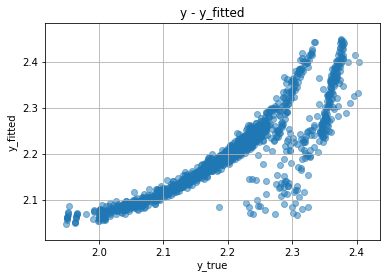

In [200]:
# Plot fitted values against true values 

y_fitted = lr.fit(X, y).predict(X)

plt.scatter(y, y_fitted, alpha=0.5)
plt.title("y - y_fitted")
plt.xlabel("y_true")
plt.ylabel("y_fitted")
plt.grid(True)

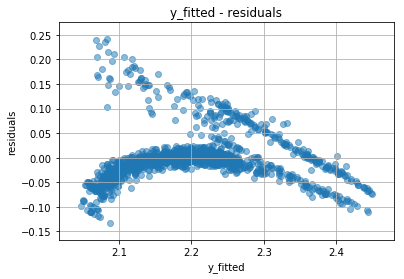

In [201]:
# Plot residuals versus fitted values
residuals = y - y_fitted

plt.scatter(y_fitted, residuals, alpha=0.5)
plt.title("y_fitted - residuals")
plt.xlabel("y_fitted")
plt.ylabel("residuals")
plt.grid(True)

### Repeat Correlation Exploration part

In [203]:
# Convert to numerical feature
data3 = pd.read_csv('insurance_data.csv', header=0, sep=',')
fn123 = data3[['ft1','ft2','ft3']]
ft_dict = {"female":0,"male":1,"yes":1,"no":0,
          "northwest":1,"northeast":2,"southwest":3,"southeast":4}
fn4 = data3['ft4'].values
fn5 = data3['ft5'].values
L = len(fn4)
for i in range(L):
    fn4[i] = 1 if fn4[i] == "male" else 0
    fn5[i] = 1 if fn5[i] == "yes" else 0
fn6 = data3['ft6'].values
for i in range(L):
    if fn6[i] == "northwest":
        fn6[i] = ft_dict["northwest"]
    elif fn6[i] == "northeast":
        fn6[i] = ft_dict["northeast"]
    elif fn6[i] == "southwest":
        fn6[i] = ft_dict["southwest"]
    elif fn6[i] == "southeast":
        fn6[i] = ft_dict["southeast"]
    else:
        print("Value Error!")
        print(i)
        break
fn4 = pd.DataFrame(fn4, columns = ['ft4'])
fn5 = pd.DataFrame(fn5, columns = ['ft5'])
fn6 = pd.DataFrame(fn6, columns = ['ft6'])
X = pd.concat([fn123, fn4, fn5, fn6], axis = 1)

y = data3['charges'].values
for i in range(L):
    y[i] = mt.log(y[i])

In [204]:
# Use f_regression
f_score, p_val = f_regression(X,y)
f_score_sort_idx = np.argsort(-f_score)
print('-'*20, "f_regression", '-'*20)
print("The first relevant feature is:","ft",f_score_sort_idx[0]+1)
print("The corresponding f-score is:",f_score[f_score_sort_idx[0]])
print("The corresponding p-value is:",p_val[f_score_sort_idx[0]])
print("The second relevant feature is:","ft",f_score_sort_idx[1]+1)
print("The corresponding f-score is:",f_score[f_score_sort_idx[1]])
print("The corresponding p-value is:",p_val[f_score_sort_idx[1]])

-------------------- f_regression --------------------
The first relevant feature is: ft 5
The corresponding f-score is: 1062.123922924936
The corresponding p-value is: 6.30764635716894e-172
The second relevant feature is: ft 1
The corresponding f-score is: 515.9770811225018
The corresponding p-value is: 7.477385218937348e-97


In [205]:
# Use mutual information regression measure
mi = mutual_info_regression(X, y, random_state = 42)
mi_sort_idx = np.argsort(-mi)
print('-'*20, "mutual_info_regression", '-'*20)
print("The first relevant feature is:","ft",mi_sort_idx[0]+1)
print("The mutual-info is:",mi[mi_sort_idx[0]])
print("The second relevant feature is:","ft",mi_sort_idx[1]+1)
print("The mutual-info is:",mi[mi_sort_idx[1]])

-------------------- mutual_info_regression --------------------
The first relevant feature is: ft 1
The mutual-info is: 1.5028511068473298
The second relevant feature is: ft 5
The mutual-info is: 0.3693933526662416


#### Still ft1 & ft5 are selected.

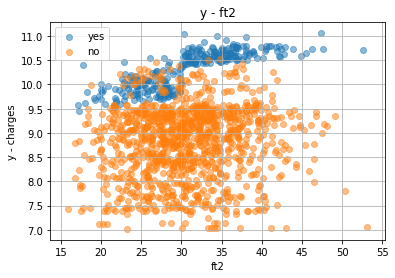

In [207]:
# Plot y against ft2

ft1 = data3['ft1'].values
ft2 = data3['ft2'].values
ft5_y = [i for i in range(L) if fn5.values[i] > 0]
ft5_n = [i for i in range(L) if fn5.values[i] == 0]

plt.scatter(ft2[ft5_y], y[ft5_y], alpha=0.5)
plt.scatter(ft2[ft5_n], y[ft5_n], alpha=0.5)
plt.title("y - ft2")
plt.xlabel("ft2")
plt.ylabel("y - charges")
plt.grid(True)
plt.legend(['yes','no'])

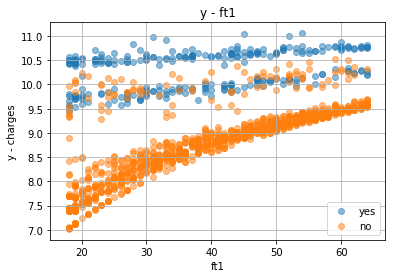

In [208]:
# Plot y against ft1
plt.scatter(ft1[ft5_y], y[ft5_y], alpha=0.5)
plt.scatter(ft1[ft5_n], y[ft5_n], alpha=0.5)
plt.title("y - ft1")
plt.xlabel("ft1")
plt.ylabel("y - charges")
plt.grid(True)
plt.legend(['yes','no'])

## Bonus question:
- Considering current results, can you further improbe your results by better feature encoding? You can try polymonial features or different combinations of encoding methods.
- Can you further improve your results by picking a better model?
    * You should try at least three different types of models (e.g. random forest, neural network, gradient boosting tree)
    * You can also try to modify the hyper-parameters of the models you have tried. Hint: you can use GridSearchCV as in project 1.